Shapefile in Tabular Form:
  pc11_s_id pc11_d_id        d_name  \
0        24       468       Kachchh   
1        24       469  Banas Kantha   
2        24       470         Patan   
3        24       471      Mahesana   
4        24       472  Sabar Kantha   

                                            geometry  
0  MULTIPOLYGON (((70.45008 23.01226, 70.44904 23...  
1  MULTIPOLYGON (((71.24964 24.20926, 71.24207 24...  
2  MULTIPOLYGON (((71.42507 23.96967, 71.42497 23...  
3  POLYGON ((72.79975 24.07615, 72.80022 24.07529...  
4  POLYGON ((73.14784 24.47759, 73.14773 24.4741,...  


<Figure size 1000x1000 with 0 Axes>

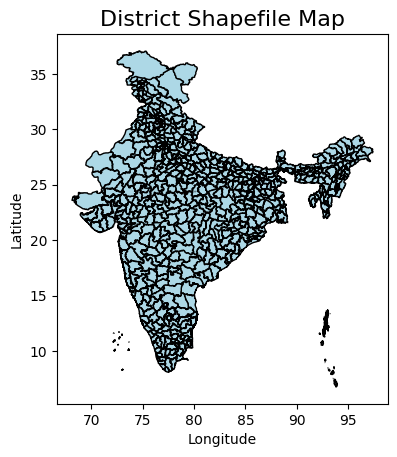

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile
shapefile_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/01_Raw/Shapefiles/shrug_district_shapefile/district.shp"

# Load the shapefile using GeoPandas
district_gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the shapefile in tabular form
print("Shapefile in Tabular Form:")
print(district_gdf.head())

# Plot the shapefile to visualize the map
plt.figure(figsize=(10, 10))
district_gdf.plot(color='lightblue', edgecolor='black')
plt.title("District Shapefile Map", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

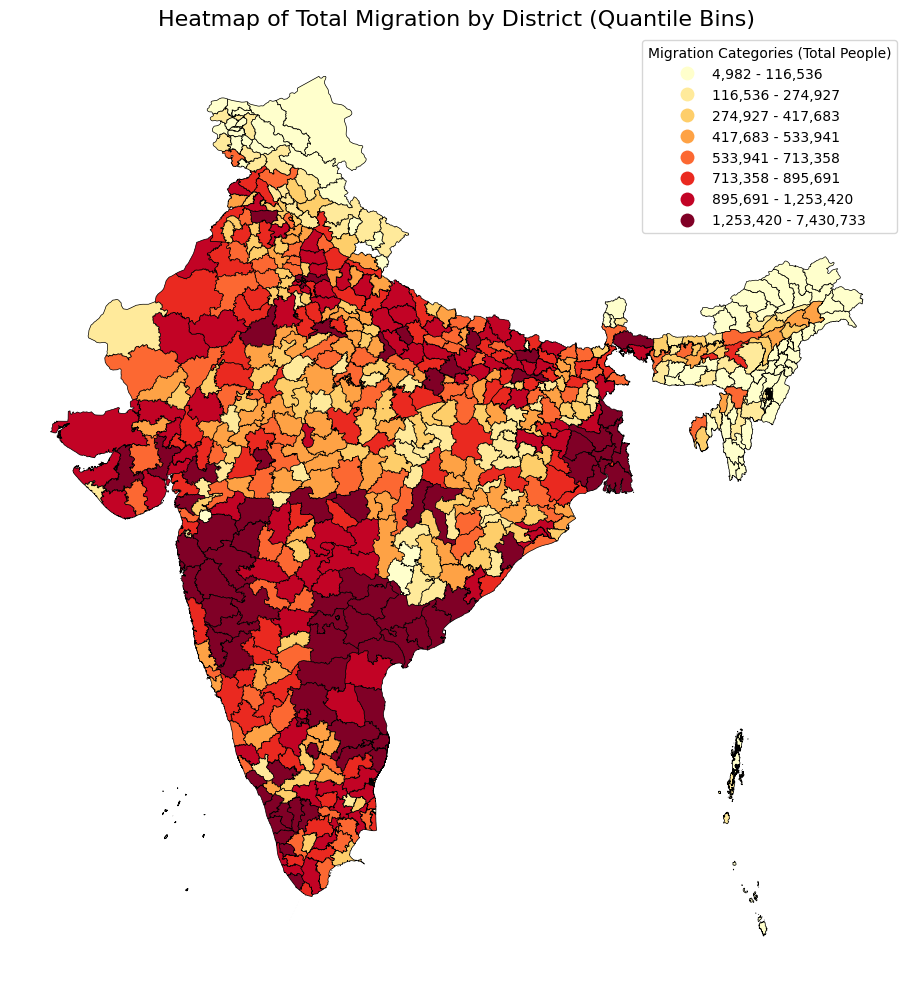

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with migration data
data_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/02_Output/Census Districts Data/2011/total_migration_with_reasons.csv'
migration_data = pd.read_csv(data_path)

# Drop rows with missing values in the 'state' column
migration_data = migration_data.dropna(subset=['state'])

# Fix the format of 'state' and 'district' columns
migration_data['state'] = migration_data['state'].apply(lambda x: int(x))
migration_data['district'] = migration_data['district'].apply(lambda x: int(x))

# Load the shapefile
shapefile_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/01_Raw/Shapefiles/shrug_district_shapefile/district.shp'
district_shapes = gpd.read_file(shapefile_path)

district_shapes['pc11_s_id'] = district_shapes['pc11_s_id'].astype(int)
district_shapes['pc11_d_id'] = district_shapes['pc11_d_id'].astype(int)

# Merge the dataset with the shapefile
merged_data = district_shapes.merge(
    migration_data,
    left_on=['pc11_s_id', 'pc11_d_id'],
    right_on=['state', 'district'],
    how='left'
)

# Define dynamic bins using quantiles for better contrast
num_bins = 8
merged_data['migration_bin'] = pd.qcut(
    merged_data['total_people'],
    q=num_bins,
    labels=[f'Q{i+1}' for i in range(num_bins)]
)

# Define custom bin labels for legend clarity
bin_edges = merged_data['total_people'].quantile([i/num_bins for i in range(num_bins + 1)]).values
bin_labels = [f'{int(bin_edges[i]):,} - {int(bin_edges[i+1]):,}' for i in range(num_bins)]

# Plot the heatmap with quantile-based bins
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
heatmap = merged_data.plot(
    column='migration_bin',
    cmap='YlOrRd',
    linewidth=0.5,
    ax=ax,
    edgecolor='black',
    legend=True,
    legend_kwds={'title': "Migration Categories (Total People)", 'labels': bin_labels}
)

# Add titles and improve layout
ax.set_title('Heatmap of Total Migration by District (Quantile Bins)', fontsize=16)
ax.set_axis_off()

# Save the heatmap to the specified directory
output_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/04_Results/District_Graphs/Total Population/total_migration_heatmap_quantile_bins.png'

plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


In [59]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with migration data
data_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/02_Output/Census Districts Data/2011/total_migration_with_reasons.csv'
migration_data = pd.read_csv(data_path)

# Drop rows with missing values in the 'state' column
migration_data = migration_data.dropna(subset=['state'])

# Fix the format of 'state' and 'district' columns
migration_data['state'] = migration_data['state'].apply(lambda x: int(x))
migration_data['district'] = migration_data['district'].apply(lambda x: int(x))

# Load the shapefile
shapefile_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/01_Raw/Shapefiles/shrug_district_shapefile/district.shp'
district_shapes = gpd.read_file(shapefile_path)

district_shapes['pc11_s_id'] = district_shapes['pc11_s_id'].astype(int)
district_shapes['pc11_d_id'] = district_shapes['pc11_d_id'].astype(int)

# Merge the dataset with the shapefile
merged_data = district_shapes.merge(
    migration_data,
    left_on=['pc11_s_id', 'pc11_d_id'],
    right_on=['state', 'district'],
    how='left'
)

# Variables to loop over
variables = {
    'people_for_work': 'People who have Migrated Due to Work',
    'people_for_business': 'People who have Migrated Due to Business',
    'people_for_education': 'People who have Migrated Due to Education',
    'people_for_marriage': 'People who have Migrated Due to Marriage',
    'people_after_birth': 'People who have Migrated After Birth',
    'people_moved_with_hh': 'People who have Migrated along with the Household',
    'people_other_reasons': 'People who have Migrated Due to Other Reasons'
}

# Output directory
output_dir = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/04_Results/District_Graphs/Migrations with Reasons'

# Loop through each variable and create a heatmap
for variable, title in variables.items():
    # Create quantile-based bins for better contrast
    num_bins = 10
    merged_data[f'binned_{variable}'] = pd.qcut(
        merged_data[variable],
        q=num_bins,
        labels=[f'Q{i+1}' for i in range(num_bins)]
    )

    # Define custom bin labels for legend clarity
    bin_edges = merged_data[variable].quantile([i/num_bins for i in range(num_bins + 1)]).values
    bin_labels = [f'{int(bin_edges[i]):,} - {int(bin_edges[i+1]):,}' for i in range(num_bins)]

    # Plot the heatmap
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    heatmap = merged_data.plot(
        column=f'binned_{variable}',
        cmap='YlOrRd',
        linewidth=0.5,
        ax=ax,
        edgecolor='black',
        legend=True,
        legend_kwds={'title': "Number of People", 'labels': bin_labels}
    )

    # Add titles and improve layout
    ax.set_title(title, fontsize=16)
    ax.set_axis_off()

    # Save the map
    output_path = f"{output_dir}/{variable}_heatmap_quantile_bins.png"
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.close(fig)


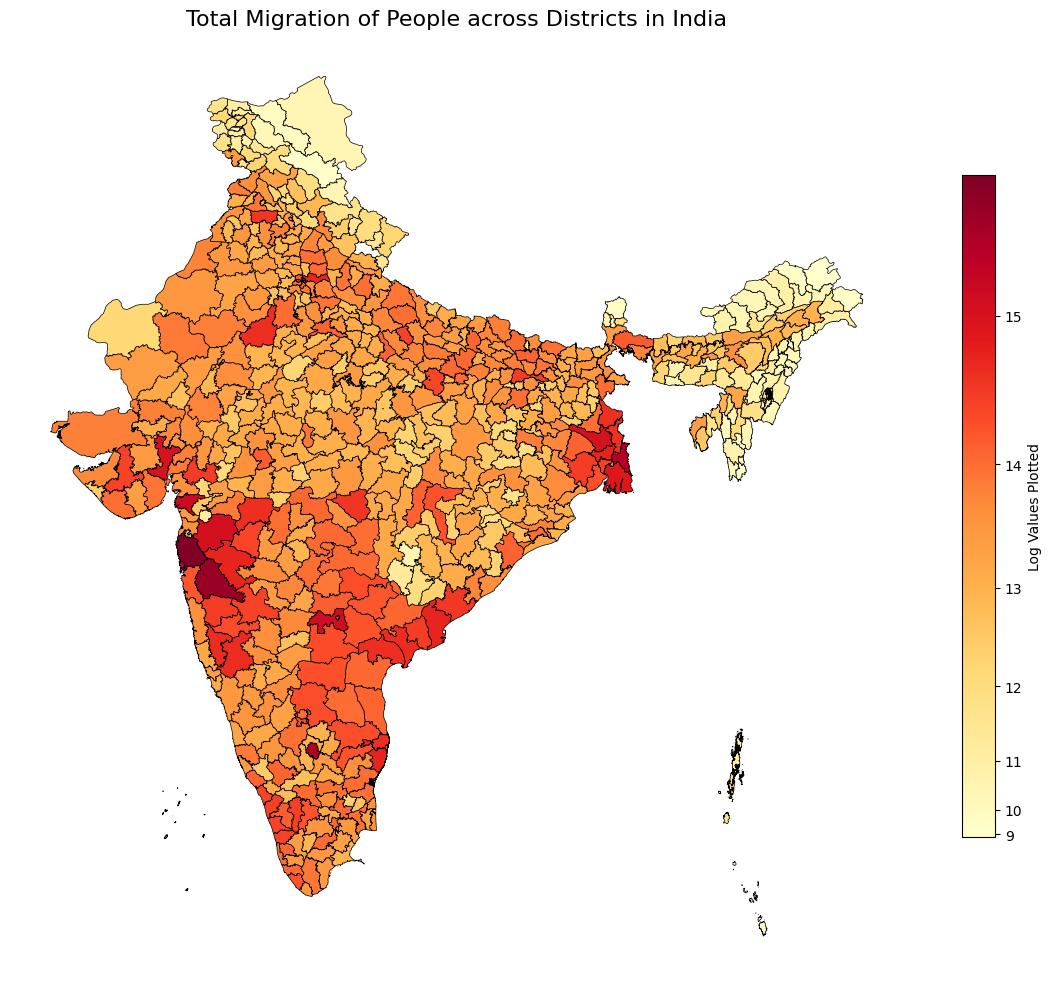

In [72]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with migration data
data_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/02_Output/Census Districts Data/2011/total_migration_with_reasons.csv'
migration_data = pd.read_csv(data_path)

# Drop rows with missing values in the 'state' column
migration_data = migration_data.dropna(subset=['state'])

# Fix the format of 'state' and 'district' columns
migration_data['state'] = migration_data['state'].apply(lambda x: int(x))
migration_data['district'] = migration_data['district'].apply(lambda x: int(x))

# Compute log of total_people, handling zeros or negatives
migration_data['log_total_people'] = migration_data['total_people'].apply(lambda x: np.log(x + 1))

# Load the shapefile
shapefile_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/01_Raw/Shapefiles/shrug_district_shapefile/district.shp'
district_shapes = gpd.read_file(shapefile_path)

district_shapes['pc11_s_id'] = district_shapes['pc11_s_id'].astype(int)
district_shapes['pc11_d_id'] = district_shapes['pc11_d_id'].astype(int)

# Merge the dataset with the shapefile
merged_data = district_shapes.merge(
    migration_data,
    left_on=['pc11_s_id', 'pc11_d_id'],
    right_on=['state', 'district'],
    how='left'
)

# Plot the heatmap with adjusted contrast using PowerNorm
from matplotlib.colors import PowerNorm

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
heatmap = merged_data.plot(
    column='log_total_people',
    cmap='YlOrRd',
    linewidth=0.5,
    ax=ax,
    edgecolor='black',
    legend=True,
    norm=PowerNorm(gamma=2),  # Reduce contrast to highlight higher values
    legend_kwds={'label': "Log Values Plotted", 'shrink': 0.7}
)

# Add titles and improve layout
ax.set_title('Total Migration of People across Districts in India', fontsize=16)
ax.set_axis_off()

# Save the heatmap to the specified directory
output_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/04_Results/District_Graphs/Total Population/log_total_migration_heatmap_balanced.png'

plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


In [75]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm

# Load the dataset with migration data
data_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/02_Output/Census Districts Data/2011/total_migration_with_reasons.csv'
migration_data = pd.read_csv(data_path)

# Drop rows with missing values in the 'state' column
migration_data = migration_data.dropna(subset=['state'])

# Fix the format of 'state' and 'district' columns
migration_data['state'] = migration_data['state'].astype(int)
migration_data['district'] = migration_data['district'].astype(int)

# Load the shapefile
shapefile_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/01_Raw/Shapefiles/shrug_district_shapefile/district.shp'
district_shapes = gpd.read_file(shapefile_path)

district_shapes['pc11_s_id'] = district_shapes['pc11_s_id'].astype(int)
district_shapes['pc11_d_id'] = district_shapes['pc11_d_id'].astype(int)

# Merge the dataset with the shapefile
merged_data = district_shapes.merge(
    migration_data,
    left_on=['pc11_s_id', 'pc11_d_id'],
    right_on=['state', 'district'],
    how='left'
)

# Variables to loop over
variables = {
    'people_for_work': 'People who have Migrated Due to Work',
    'people_for_business': 'People who have Migrated Due to Business',
    'people_for_education': 'People who have Migrated Due to Education',
    'people_for_marriage': 'People who have Migrated Due to Marriage',
    'people_after_birth': 'People who have Migrated After Birth',
    'people_moved_with_hh': 'People who have Migrated along with the Household',
    'people_other_reasons': 'People who have Migrated Due to Other Reasons'
}

# Output directory
output_dir = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Migrant_Loans/04_Results/District_Graphs/Migrations with Reasons'

# Loop through each variable and create a heatmap
for variable, title in variables.items():
    # Compute the log of the variable, handling zeros
    merged_data[f'log_{variable}'] = merged_data[variable].apply(lambda x: np.log(x + 1))
    
    # Plot the heatmap
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    heatmap = merged_data.plot(
        column=f'log_{variable}',
        cmap='YlOrRd',
        linewidth=0.5,
        ax=ax,
        edgecolor='black',
        legend=True,
        norm=PowerNorm(gamma=2),  # Adjust contrast to highlight higher values
        legend_kwds={'label': f"Log of {title}", 'shrink': 0.7}
    )

    # Add titles and improve layout
    ax.set_title(title, fontsize=16)
    ax.set_axis_off()

    # Save the map
    output_path = f"{output_dir}/{variable}_log_heatmap.png"
    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)
